In [1]:
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2 as cv

Couldn't import dot_parser, loading of dot files will not be possible.


In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

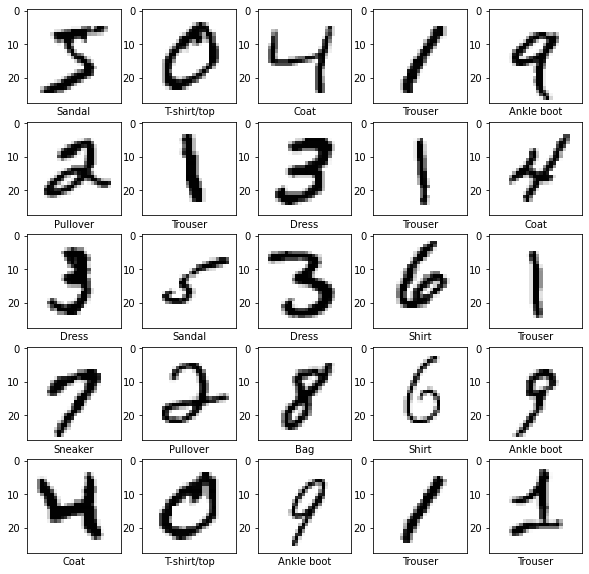

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i]])
plt.show()

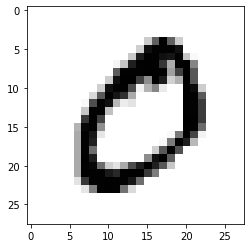

In [4]:
#for img in train_images:
#output = None
#cv.warpPolar(train_images[0], output, 32*32*3, (32/2, 32/2), (cv.INTER_LINEAR, cv.WARP_POLAR_LINEAR))
plt.imshow(train_images[1], cmap=plt.cm.binary)

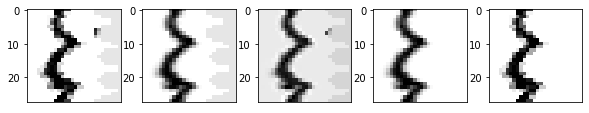

In [5]:
def polarimg(img, flags, i):
    value = np.sqrt(((img.shape[0]/2.0)**2.0)+((img.shape[1]/2.0)**2.0))
    polar_image = cv.linearPolar(img,(img.shape[0]/2, img.shape[1]/2), value, flags)
    plt.subplot(5,5,i+1)
    plt.xticks([]) 
    plt.grid(False)
    return polar_image

plt.figure(figsize=(10,10))




plt.imshow(polarimg(train_images[1], cv.INTER_NEAREST, 0), cmap=plt.cm.binary)
plt.imshow(polarimg(train_images[1], cv.INTER_LINEAR, 1), cmap=plt.cm.binary)
plt.imshow(polarimg(train_images[1], cv.INTER_CUBIC, 2), cmap=plt.cm.binary)
plt.imshow(polarimg(train_images[1], cv.INTER_AREA , 3), cmap=plt.cm.binary)
plt.imshow(polarimg(train_images[1], cv.WARP_FILL_OUTLIERS, 4), cmap=plt.cm.binary)

plt.show()

#print(polar_image)

#polar_image = polar_image.astype(np.uint8)


In [6]:
image = np.arange(1,10).reshape(3,3)
print(image)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [7]:
image=np.insert(image,[1,2,3],[7,8,9],0)
print(image)

[[1 2 3]
 [7 8 9]
 [4 5 6]
 [7 8 9]
 [7 8 9]
 [7 8 9]]


(48, 48)

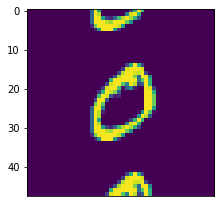

In [8]:
plt.figure(figsize=(20,20))

plt.subplot(5,5,1)
plt.xticks([])
plt.grid(False)
bottom = train_images[1][-10:]
top = train_images[1][:10]

img = np.insert(train_images[1], 0, bottom, 0)
img = np.insert(img, len(img), top, 0)
img = np.insert(img, [0], [0] * 10, 1)
img = np.insert(img, [-1], [0] * 10, 1)

plt.imshow(img)

img.shape
#plt.subplot(5,5,2)
#plt.xticks([])
#plt.grid(False)
#plt.imshow(train_images[0], cmap=plt.cm.binary)

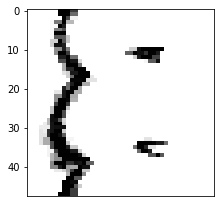

In [9]:
plt.figure(figsize=(20,20))

plt.imshow(polarimg(img, cv.WARP_FILL_OUTLIERS, 1), cmap=plt.cm.binary)

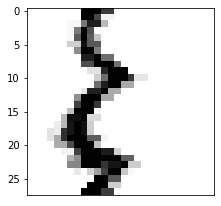

In [10]:
plt.figure(figsize=(20,20))

plt.imshow(polarimg(train_images[1], cv.WARP_FILL_OUTLIERS, 1), cmap=plt.cm.binary)

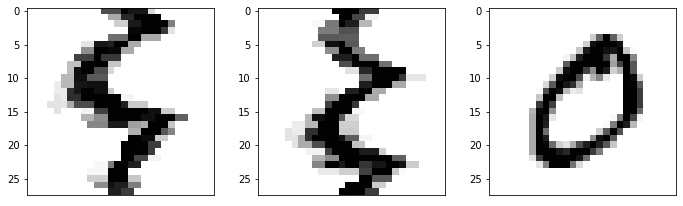

In [11]:
testimg = train_images[1]

H, W = testimg.shape

img = cv.linearPolar(np.rot90(testimg), (H // 2, W // 2), W / 2, cv.WARP_FILL_OUTLIERS)

plt.figure(figsize=(20,20))

plt.subplot(5,5,1)
plt.xticks([])
plt.grid(False)
plt.imshow(img, cmap=plt.cm.binary)

plt.subplot(5,5,2)
plt.xticks([])
plt.grid(False)
img = cv.linearPolar(testimg, (H // 2, W // 2), W / 2, cv.WARP_FILL_OUTLIERS)
plt.imshow(img, cmap=plt.cm.binary)


plt.subplot(5,5,3)
plt.xticks([])
plt.grid(False)
plt.imshow(train_images[1], cmap=plt.cm.binary)

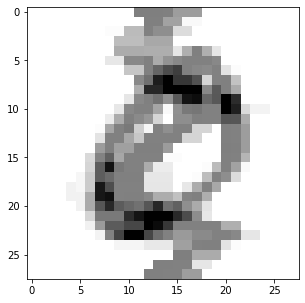

In [12]:
plt.figure(figsize=(5,5))
img2 = 0.5 * img + train_images[1] * 0.5
plt.imshow(img2, cmap=plt.cm.binary)

# Cnn model

In [13]:
model = models.Sequential()
model.add(layers.Conv2D(48, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(48, 48, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [14]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 48)        480       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 48)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 21, 64)        27712     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                2

In [16]:
def padImage(image):
    bottom = image[-10:]
    top = image[:10]

    img = np.insert(image, 0, bottom, 0)
    img = np.insert(img, len(img), top, 0)
    img = np.insert(img, [0], [0] * 10, 1)
    img = np.insert(img, [-1], [0] * 10, 1)
    return img


In [17]:
#padTrain = ((padImage(train_images[i]), np.array(train_labels[i])) for i in range(0, len(train_images)))
#polarizedTrain = ((np.expand_dims(np.expand_dims(cv.linearPolar(p[0], (p[0].shape[0] // 2, p[0].shape[1] // 2), p[0].shape[1] / 2, cv.WARP_FILL_OUTLIERS), -1), 0), np.array(p[1])) for p in padTrain)

#padVal = ((padImage(test_images[i]), test_labels[i]) for i in range(0, len(test_images)))
#polarizedVal = ((cv.linearPolar(p[0], (p[0].shape[0] // 2, p[0].shape[1] // 2), p[0].shape[1] / 2, cv.WARP_FILL_OUTLIERS), p[1]) for p in padVal)

polarTraining = []
polarTest = []
polarTestRotated = []
# reshape dataset to have a single channel
for i in range(0, len(train_images)):
    padImg = padImage(train_images[i])
    polarTraining.append(cv.linearPolar(padImg, (padImg.shape[0] // 2, padImg.shape[1] // 2), padImg.shape[1] / 2, cv.WARP_FILL_OUTLIERS))
    
for i in range(0, len(test_images)):
    padImg = padImage(test_images[i])
    polarTest.append(cv.linearPolar(padImg, (padImg.shape[0] // 2, padImg.shape[1] // 2), padImg.shape[1] / 2, cv.WARP_FILL_OUTLIERS))
    
for i in range (0, len(test_images)):
    padImg = padImage(test_images[i])
    padImgRotated = tfa.image.rotate(padImg, np.random.randint(-90, 90) * np.pi / 180, fill_mode = 'nearest').numpy()
    polarTestRotated.append(cv.linearPolar(padImgRotated, (padImgRotated.shape[0] // 2, padImgRotated.shape[1] // 2), padImgRotated.shape[1] / 2, cv.WARP_FILL_OUTLIERS))

polarTraining = np.asarray(polarTraining).reshape((np.asarray(polarTraining).shape[0], 48, 48, 1))
polarTest = np.asarray(polarTest).reshape((np.asarray(polarTest).shape[0], 48, 48, 1))
polarTestRotated = np.asarray(polarTestRotated).reshape((np.asarray(polarTestRotated).shape[0], 48, 48, 1))
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model_path = 'models/CNN_Polar_MNIST'
if os.path.exists(model_path):
    model = tf.keras.models.load_model(model_path)
    history = None
else:
    history = model.fit(x = polarTraining, y = train_labels, epochs=10)
    
# Save model
#model.save(model_path)

Epoch 1/10
1875/1875 [==============================] - 115s 61ms/step - loss: 0.2673 - accuracy: 0.9162
Epoch 2/10
1875/1875 [==============================] - 96s 51ms/step - loss: 0.0487 - accuracy: 0.9846
Epoch 3/10
1875/1875 [==============================] - 113s 60ms/step - loss: 0.0312 - accuracy: 0.9899
Epoch 4/10
1875/1875 [==============================] - 117s 62ms/step - loss: 0.0221 - accuracy: 0.9929
Epoch 5/10
1875/1875 [==============================] - 124s 66ms/step - loss: 0.0163 - accuracy: 0.9948
Epoch 6/10
1875/1875 [==============================] - 125s 67ms/step - loss: 0.0121 - accuracy: 0.9961
Epoch 7/10
1875/1875 [==============================] - 125s 66ms/step - loss: 0.0117 - accuracy: 0.9963
Epoch 8/10
1875/1875 [==============================] - 124s 66ms/step - loss: 0.0095 - accuracy: 0.9970
Epoch 9/10
1875/1875 [==============================] - 124s 66ms/step - loss: 0.0103 - accuracy: 0.9968
Epoch 10/10
1875/1875 [==============================] -

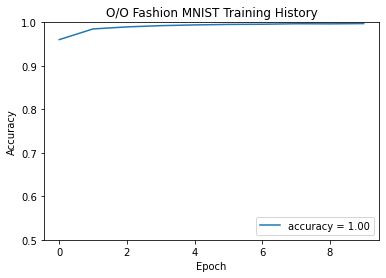

In [18]:
if history:
    train_acc = history.history['accuracy'][-1]
    #val_acc = history.history['val_accuracy'][-1]
    plt.plot(history.history['accuracy'], label=f'accuracy = {train_acc:.2f}')
    #plt.plot(history.history['val_accuracy'], label = f'val_accuracy = {val_acc:.2f}')
    plt.title('O/O Fashion MNIST Training History')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1])
    plt.legend(loc='lower right')

In [19]:
test_loss, test_acc = model.evaluate(polarTest,  test_labels, verbose=1)

313/313 [==============================] - 4s 12ms/step - loss: 0.0423 - accuracy: 0.9889


In [20]:
#test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))
#test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [21]:
def generator(data, labels, projector):
    for i in range(len(data)):
        yield np.expand_dims(projector(data[i]),0), np.array(labels[i])

In [24]:
rotation_gen = generator(polarTest, test_labels, lambda x: tfa.image.rotate(
                                                                       x, 
                                                                       np.random.randint(-50, 50), 
                                                                       fill_mode='nearest'))

In [25]:
model.evaluate(polarTestRotated, test_labels, verbose=1)

313/313 [==============================] - 3s 10ms/step - loss: 4.1147 - accuracy: 0.5833


[4.114745140075684, 0.583299994468689]